<a href="https://colab.research.google.com/github/anpham1331/ECGR4105-Intro-to-ML/blob/main/ECGR_4105_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#https://github.com/anpham1331/ECGR4105-Intro-to-ML/tree/main

#uses Temperature example from lecture and Housing.csv for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

import torch
import torch.optim as optim

from google.colab import drive
drive.mount('/content/drive')

path_file2 = "/content/drive/MyDrive/ECGR 4105 - Intro to ML/Datasets/Housing.csv"
housing = pd.read_csv(path_file2)

# Defining the map function for cancer. Maps yes to 1 and no to 0
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#Problem 1 - SGD
#w2 * t_u ** 2 + w1 * t_u + b

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c) #output
t_u = torch.tensor(t_u) #input

#Non linear Model
def model(t_u, params):
  w1,w2,b = params
  return w2 * t_u ** 2 + w1 * t_u + b

#Normalization
t_u = (t_u - t_u.mean()) / t_u.std()

#parameters
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

#Loss Function
def loss_fn(t_p, t_c):
  squared_diff = (t_p - t_c)**2
  return squared_diff.mean()

#Training Loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    # Initialize parameters
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

    # SGD Optimization
    optimizer = optim.SGD([params], lr=lr)

    # Actual Training
    print(f"Learning Rate: {lr}")
    training_loop(n_epochs=5000, optimizer=optimizer, params=params, t_u=t_u, t_c=t_c)

    # Final parameters and loss
    final_params = params.detach().numpy()
    final_t_p = model(t_u, final_params)
    final_loss = loss_fn(final_t_p, t_c)
    print("Final Parameters:", final_params)
    print("Final Predictions:", final_t_p)
    print("Final Loss:", final_loss.item())
    print("--------------------------------------")

Learning Rate: 0.1
Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720
Final Parameters: [9.103333   0.80190283 9.770996  ]
Final Predictions: tensor([ 1.7972, 12.0360, 13.3483, 28.6146, 12.2621,  8.2264,  0.9969, -3.9067,
         7.9649, 14.6315, 19.5288])
Final Loss: 2.090719699859619
--------------------------------------
Learning Rate: 0.01
Epoch 500, Loss 2.092286
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090719
Epoch 2000, Loss 2.090719
Epoch 2500, Loss 2.090719
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090719
Epoch 4000, Loss 2.090719
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719
Final Parameters: [9.103358 0.80192  9.770959]
Final Predictions: tensor([ 1.7972, 12.0360, 13.3483, 28.6147, 12.2620,  8.2263,  0.9969, -3.9067,
         7.9648, 14.6315, 19.5289])
Fina

In [36]:
#Problem 1 - ADAM
#w2 * t_u ** 2 + w1 * t_u + b

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c) #output
t_u = torch.tensor(t_u) #input

#Non linear Model
def model(t_u, params):
  w1,w2,b = params
  return w2 * t_u ** 2 + w1 * t_u + b

#Normalization
t_u = (t_u - t_u.mean()) / t_u.std()

#parameters
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

#Loss Function
def loss_fn(t_p, t_c):
  squared_diff = (t_p - t_c)**2
  return squared_diff.mean()

#Training Loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    # Initialize parameters
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

    # Adam Optimization
    optimizer = optim.Adam([params], lr=lr)

    # Actual Training
    print(f"Learning Rate: {lr}")
    training_loop(n_epochs=5000, optimizer=optimizer, params=params, t_u=t_u, t_c=t_c)

    # Final parameters and loss
    final_params = params.detach().numpy()
    final_t_p = model(t_u, final_params)
    final_loss = loss_fn(final_t_p, t_c)
    print("Final Parameters:", final_params)
    print("Final Predictions:", final_t_p)
    print("Final Loss:", final_loss.item())
    print("--------------------------------------")

Learning Rate: 0.1
Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719
Final Parameters: [9.103332  0.8019011 9.771    ]
Final Predictions: tensor([ 1.7972, 12.0360, 13.3483, 28.6146, 12.2621,  8.2264,  0.9969, -3.9067,
         7.9649, 14.6315, 19.5288])
Final Loss: 2.09071946144104
--------------------------------------
Learning Rate: 0.01
Epoch 500, Loss 37.810387
Epoch 1000, Loss 10.248041
Epoch 1500, Loss 3.446221
Epoch 2000, Loss 2.239089
Epoch 2500, Loss 2.099088
Epoch 3000, Loss 2.090908
Epoch 3500, Loss 2.090721
Epoch 4000, Loss 2.090719
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720
Final Parameters: [9.103354  0.8019186 9.770962 ]
Final Predictions: tensor([ 1.7972, 12.0360, 13.3483, 28.6146, 12.2620,  8.2263,  0.9969, -3.9067,
         7.9648, 14.6315, 19.5288])
Fin

Learning Rate: 0.1
Epoch 500/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 1000/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 1500/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 2000/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 2500/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 3000/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 3500/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 4000/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 4500/5000, Loss 24363042603008.000000, Accuracy 70.884566
Epoch 5000/5000, Loss 24363042603008.000000, Accuracy 70.884566


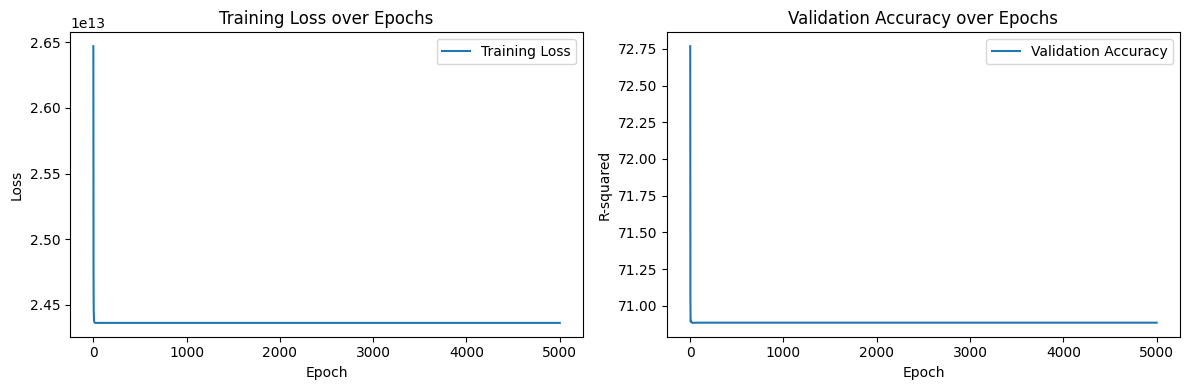

Final Validation Loss: 23522839625728.0
Final Accuracy: 70.8845655512607
--------------------------------------
Learning Rate: 0.01
Epoch 500/5000, Loss 24363038408704.000000, Accuracy 70.884198
Epoch 1000/5000, Loss 24363038408704.000000, Accuracy 70.884551
Epoch 1500/5000, Loss 24363044700160.000000, Accuracy 70.884566
Epoch 2000/5000, Loss 24363044700160.000000, Accuracy 70.884566
Epoch 2500/5000, Loss 24363044700160.000000, Accuracy 70.884566
Epoch 3000/5000, Loss 24363044700160.000000, Accuracy 70.884566
Epoch 3500/5000, Loss 24363044700160.000000, Accuracy 70.884566
Epoch 4000/5000, Loss 24363044700160.000000, Accuracy 70.884566
Epoch 4500/5000, Loss 24363044700160.000000, Accuracy 70.884566
Epoch 5000/5000, Loss 24363044700160.000000, Accuracy 70.884566


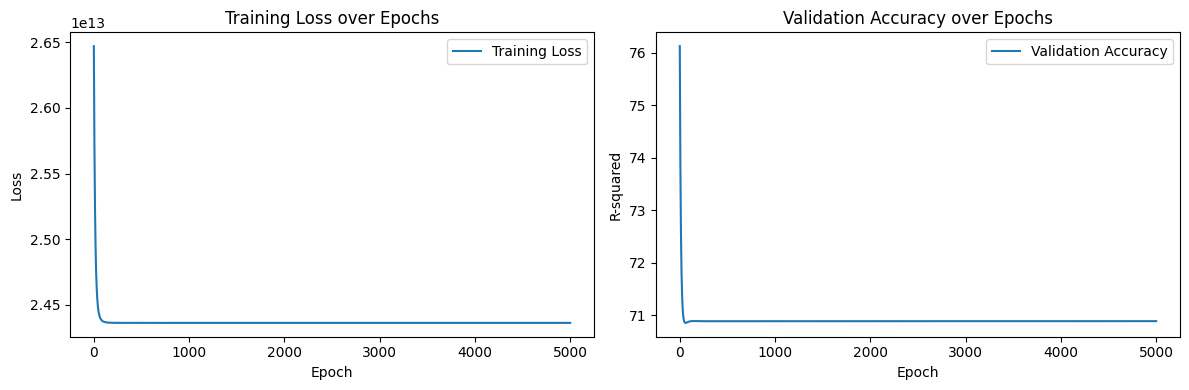

Final Validation Loss: 23522839625728.0
Final Accuracy: 70.8845655512607
--------------------------------------
Learning Rate: 0.001
Epoch 500/5000, Loss 24449422196736.000000, Accuracy 70.868333
Epoch 1000/5000, Loss 24373534654464.000000, Accuracy 70.875249
Epoch 1500/5000, Loss 24365221543936.000000, Accuracy 70.885806
Epoch 2000/5000, Loss 24363592056832.000000, Accuracy 70.884659
Epoch 2500/5000, Loss 24363193597952.000000, Accuracy 70.883563
Epoch 3000/5000, Loss 24363086643200.000000, Accuracy 70.883318
Epoch 3500/5000, Loss 24363057283072.000000, Accuracy 70.883498
Epoch 4000/5000, Loss 24363044700160.000000, Accuracy 70.883758
Epoch 4500/5000, Loss 24363042603008.000000, Accuracy 70.884010
Epoch 5000/5000, Loss 24363042603008.000000, Accuracy 70.884198


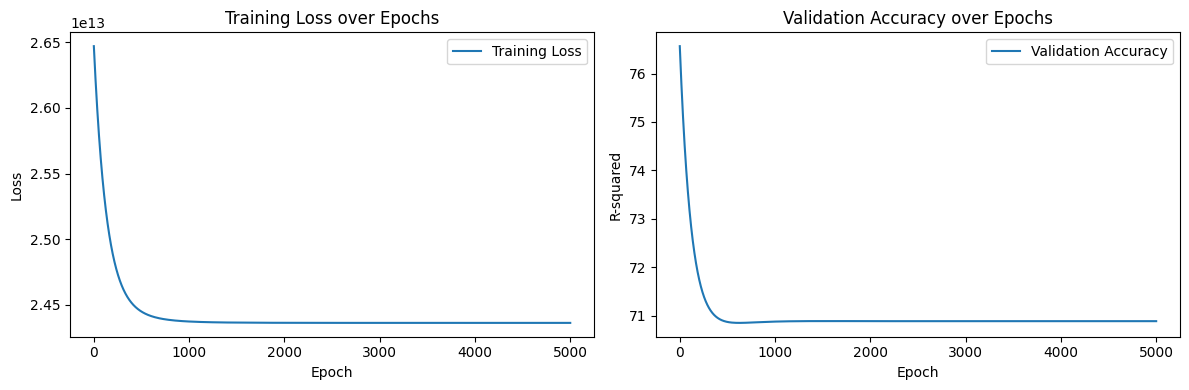

Final Validation Loss: 23522732670976.0
Final Accuracy: 70.88419778151918
--------------------------------------
Learning Rate: 0.0001
Epoch 500/5000, Loss 25832571535360.000000, Accuracy 74.580615
Epoch 1000/5000, Loss 25394052857856.000000, Accuracy 73.239287
Epoch 1500/5000, Loss 25091932946432.000000, Accuracy 72.359921
Epoch 2000/5000, Loss 24882838503424.000000, Accuracy 71.787722
Epoch 2500/5000, Loss 24737346486272.000000, Accuracy 71.419094
Epoch 3000/5000, Loss 24635483619328.000000, Accuracy 71.184723
Epoch 3500/5000, Loss 24563641483264.000000, Accuracy 71.038373
Epoch 4000/5000, Loss 24512561152000.000000, Accuracy 70.949286
Epoch 4500/5000, Loss 24475902935040.000000, Accuracy 70.897084
Epoch 5000/5000, Loss 24449329922048.000000, Accuracy 70.868312


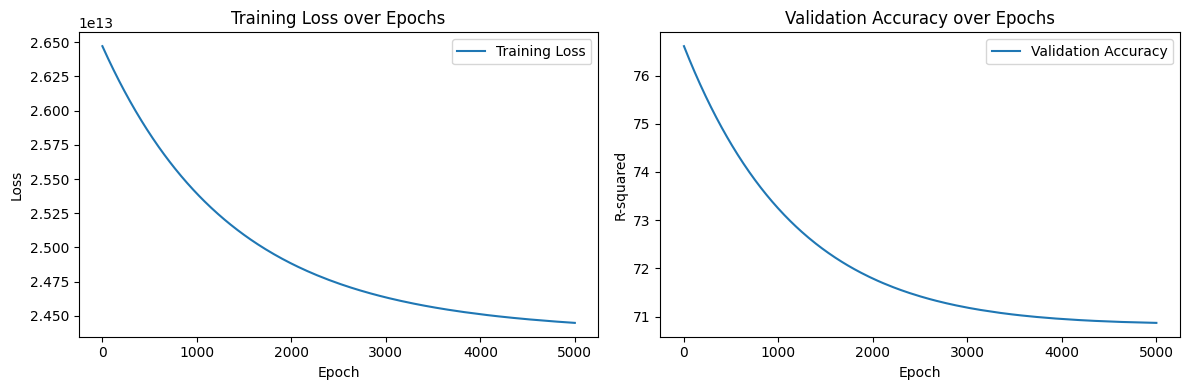

Final Validation Loss: 23518112645120.0
Final Accuracy: 70.86831157091943
--------------------------------------


In [37]:
#Problem 2 - SGD
#input variables = area bedrooms bathrooms stories parking

# Get Values
X = housing.iloc[:, [1,2,3,4,9]].values
y = housing.iloc[:, 0].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Scaling
sc = StandardScaler()  # Create a scaler object
X_train = sc.fit_transform(X_train)  # Fit the scaler to the training data and transform
X_test = sc.transform(X_test)  # Apply the scaler to the test data

# Convert to tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_test)
y_val = torch.FloatTensor(y_test)

#parameters
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 0.0 ], requires_grad=True)

#Model
def model(X_train, params):
  area,bedrooms,bathrooms,stories,parking = params
  return area * X_train[:, 0] + bedrooms * X_train[:, 1] + bathrooms * X_train[:, 2] + stories * X_train[:, 3] + parking * X_train[:, 4]


#Loss Function
def loss_fn(y_pred, y_true):
  squared_diff = (y_pred - y_true)**2
  return squared_diff.mean()

# Training Loop
def training_loop(n_epochs, optimizer, params, X_train, y_train, X_val, y_val):
    losses = []
    accuracies = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train, params)
        loss = loss_fn(y_pred, y_train)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        y_val_pred = model(X_val, params)
        val_loss = loss_fn(y_val_pred, y_val)
        val_r_squared = (abs(1 - (val_loss.item() / torch.var(y_val).item())))*10
        accuracies.append(val_r_squared)

        if epoch % 500 == 0:
            print('Epoch %d/%d, Loss %f, Accuracy %f' % (epoch, n_epochs, losses[-1], accuracies[-1]))

    # Plot losses and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, n_epochs + 1), losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, n_epochs + 1), accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('R-squared')
    plt.title('Validation Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return params


# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    # Initialize parameters
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

    # SGD Optimization
    optimizer = optim.SGD([params], lr=lr)

    # Actual Training
    print(f"Learning Rate: {lr}")
    training_loop(n_epochs=5000, optimizer=optimizer, params=params, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)

    # Final parameters and loss
    final_params = params.detach().numpy()
    final_t_p = model(X_val, final_params)
    final_loss = loss_fn(final_t_p, y_val)
    final_r_squared = 1 - (final_loss.item() / torch.var(y_val).item())

    print("Final Validation Loss:", final_loss.item())
    print("Final Accuracy:", (abs(final_r_squared))*10)
    print("--------------------------------------")


Learning Rate: 0.1
Epoch 500/5000, Loss 26469539512320.000000, Accuracy 76.613192
Epoch 1000/5000, Loss 26469105401856.000000, Accuracy 76.611829
Epoch 1500/5000, Loss 26468669194240.000000, Accuracy 76.610466
Epoch 2000/5000, Loss 26468235083776.000000, Accuracy 76.609082
Epoch 2500/5000, Loss 26467800973312.000000, Accuracy 76.607719
Epoch 3000/5000, Loss 26467366862848.000000, Accuracy 76.606356
Epoch 3500/5000, Loss 26466930655232.000000, Accuracy 76.605000
Epoch 4000/5000, Loss 26466502836224.000000, Accuracy 76.603630
Epoch 4500/5000, Loss 26466064531456.000000, Accuracy 76.602267
Epoch 5000/5000, Loss 26465630420992.000000, Accuracy 76.600904


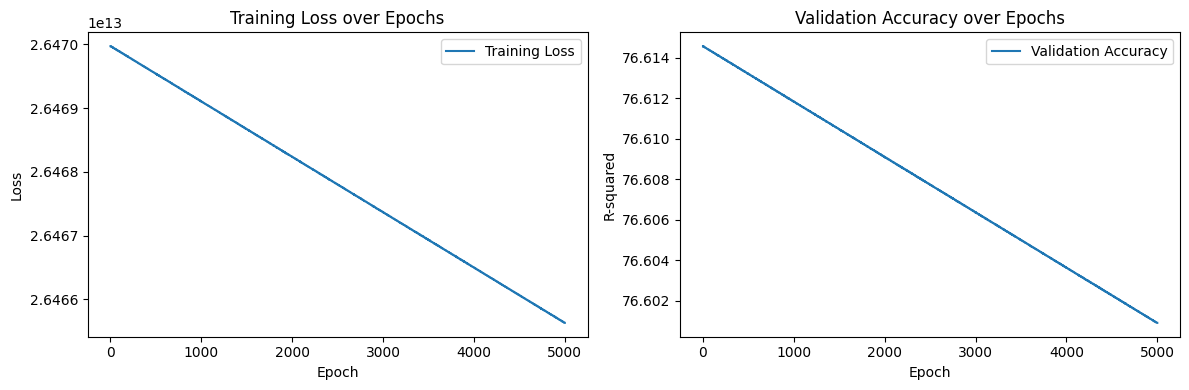

Final Validation Loss: 25185264599040.0
Final Accuracy: 76.60090438906145
--------------------------------------
Learning Rate: 0.01
Epoch 500/5000, Loss 26469929582592.000000, Accuracy 76.614425
Epoch 1000/5000, Loss 26469885542400.000000, Accuracy 76.614296
Epoch 1500/5000, Loss 26469843599360.000000, Accuracy 76.614159
Epoch 2000/5000, Loss 26469799559168.000000, Accuracy 76.614014
Epoch 2500/5000, Loss 26469755518976.000000, Accuracy 76.613884
Epoch 3000/5000, Loss 26469713575936.000000, Accuracy 76.613740
Epoch 3500/5000, Loss 26469669535744.000000, Accuracy 76.613618
Epoch 4000/5000, Loss 26469625495552.000000, Accuracy 76.613473
Epoch 4500/5000, Loss 26469583552512.000000, Accuracy 76.613336
Epoch 5000/5000, Loss 26469539512320.000000, Accuracy 76.613192


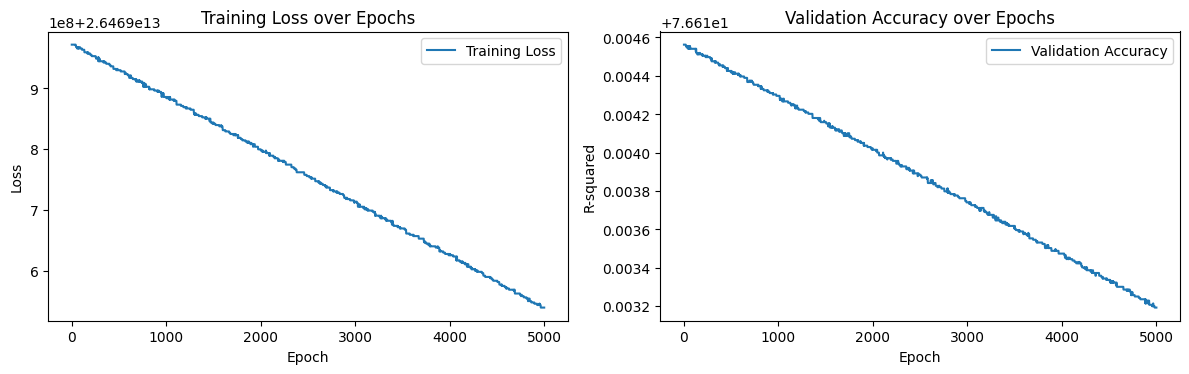

Final Validation Loss: 25188838146048.0
Final Accuracy: 76.61319222513131
--------------------------------------
Learning Rate: 0.001
Epoch 500/5000, Loss 26469967331328.000000, Accuracy 76.614541
Epoch 1000/5000, Loss 26469965234176.000000, Accuracy 76.614541
Epoch 1500/5000, Loss 26469958942720.000000, Accuracy 76.614512
Epoch 2000/5000, Loss 26469954748416.000000, Accuracy 76.614505
Epoch 2500/5000, Loss 26469952651264.000000, Accuracy 76.614497
Epoch 3000/5000, Loss 26469944262656.000000, Accuracy 76.614476
Epoch 3500/5000, Loss 26469942165504.000000, Accuracy 76.614469
Epoch 4000/5000, Loss 26469937971200.000000, Accuracy 76.614454
Epoch 4500/5000, Loss 26469931679744.000000, Accuracy 76.614440
Epoch 5000/5000, Loss 26469929582592.000000, Accuracy 76.614425


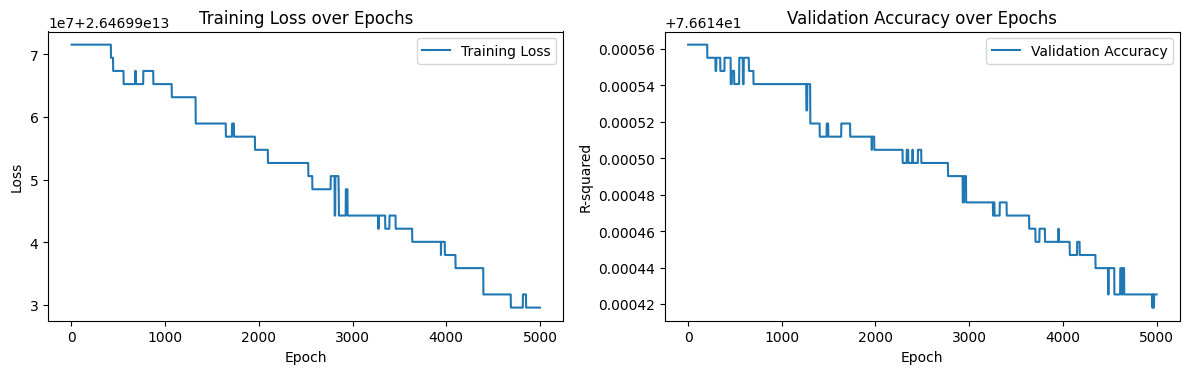

Final Validation Loss: 25189196759040.0
Final Accuracy: 76.61442533544117
--------------------------------------
Learning Rate: 0.0001
Epoch 500/5000, Loss 26469971525632.000000, Accuracy 76.614562
Epoch 1000/5000, Loss 26469971525632.000000, Accuracy 76.614562
Epoch 1500/5000, Loss 26469971525632.000000, Accuracy 76.614562
Epoch 2000/5000, Loss 26469971525632.000000, Accuracy 76.614562
Epoch 2500/5000, Loss 26469971525632.000000, Accuracy 76.614555
Epoch 3000/5000, Loss 26469971525632.000000, Accuracy 76.614548
Epoch 3500/5000, Loss 26469971525632.000000, Accuracy 76.614548
Epoch 4000/5000, Loss 26469971525632.000000, Accuracy 76.614555
Epoch 4500/5000, Loss 26469967331328.000000, Accuracy 76.614555
Epoch 5000/5000, Loss 26469967331328.000000, Accuracy 76.614541


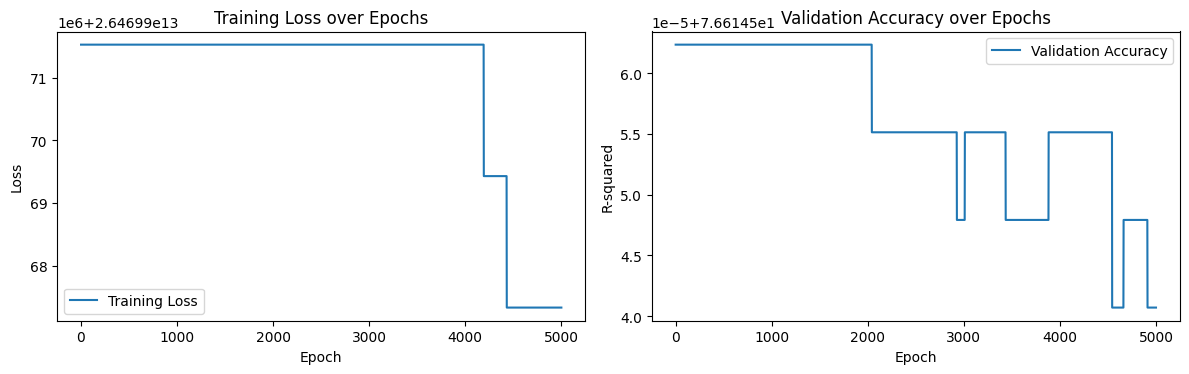

Final Validation Loss: 25189230313472.0
Final Accuracy: 76.6145407141836
--------------------------------------


In [38]:
#Problem 2 - Adam
#input variables = area bedrooms bathrooms stories parking

# Get Values
X = housing.iloc[:, [1,2,3,4,9]].values
y = housing.iloc[:, 0].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Scaling
sc = StandardScaler()  # Create a scaler object
X_train = sc.fit_transform(X_train)  # Fit the scaler to the training data and transform
X_test = sc.transform(X_test)  # Apply the scaler to the test data

# Convert to tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_test)
y_val = torch.FloatTensor(y_test)

#parameters
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 0.0 ], requires_grad=True)

#Model
def model(X_train, params):
  area,bedrooms,bathrooms,stories,parking = params
  return area * X_train[:, 0] + bedrooms * X_train[:, 1] + bathrooms * X_train[:, 2] + stories * X_train[:, 3] + parking * X_train[:, 4]


#Loss Function
def loss_fn(y_pred, y_true):
  squared_diff = (y_pred - y_true)**2
  return squared_diff.mean()

# Training Loop
def training_loop(n_epochs, optimizer, params, X_train, y_train, X_val, y_val):
    losses = []
    accuracies = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train, params)
        loss = loss_fn(y_pred, y_train)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        y_val_pred = model(X_val, params)
        val_loss = loss_fn(y_val_pred, y_val)
        val_r_squared = (abs(1 - (val_loss.item() / torch.var(y_val).item())))*10
        accuracies.append(val_r_squared)

        if epoch % 500 == 0:
            print('Epoch %d/%d, Loss %f, Accuracy %f' % (epoch, n_epochs, losses[-1], accuracies[-1]))

    # Plot losses and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, n_epochs + 1), losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, n_epochs + 1), accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('R-squared')
    plt.title('Validation Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return params


# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    # Initialize parameters
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

    # SGD Optimization
    optimizer = optim.Adam([params], lr=lr)

    # Actual Training
    print(f"Learning Rate: {lr}")
    training_loop(n_epochs=5000, optimizer=optimizer, params=params, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)

    # Final parameters and loss
    final_params = params.detach().numpy()
    final_t_p = model(X_val, final_params)
    final_loss = loss_fn(final_t_p, y_val)
    final_r_squared = 1 - (final_loss.item() / torch.var(y_val).item())

    print("Final Validation Loss:", final_loss.item())
    print("Final Accuracy:", (abs(final_r_squared))*10)
    print("--------------------------------------")


Learning Rate: 0.1
Epoch 500/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 1000/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 1500/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 2000/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 2500/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 3000/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 3500/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 4000/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 4500/5000, Loss 24101227855872.000000, Accuracy 68.998051
Epoch 5000/5000, Loss 24101227855872.000000, Accuracy 68.998051


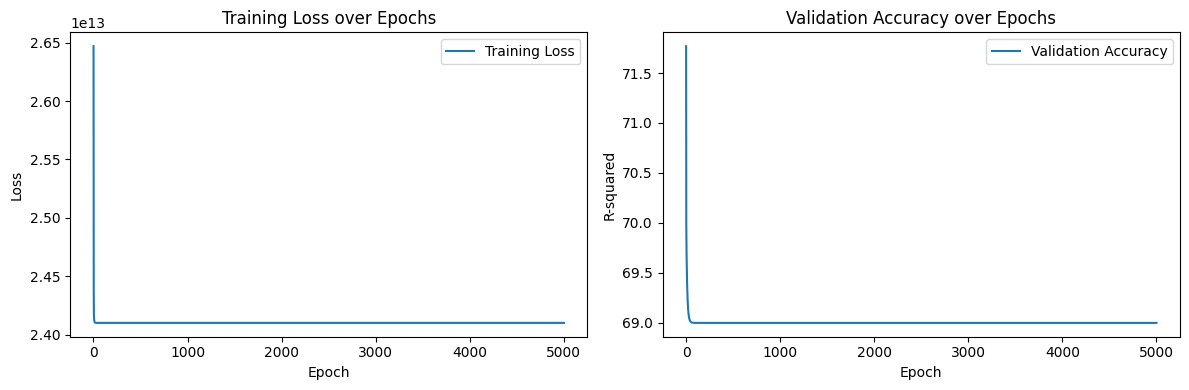

Final Validation Loss: 22974203691008.0
Final Accuracy: 68.99805100064918
--------------------------------------
Learning Rate: 0.01
Epoch 500/5000, Loss 24101227855872.000000, Accuracy 69.010959
Epoch 1000/5000, Loss 24101225758720.000000, Accuracy 68.998238
Epoch 1500/5000, Loss 24101225758720.000000, Accuracy 68.998058
Epoch 2000/5000, Loss 24101225758720.000000, Accuracy 68.998058
Epoch 2500/5000, Loss 24101225758720.000000, Accuracy 68.998058
Epoch 3000/5000, Loss 24101225758720.000000, Accuracy 68.998058
Epoch 3500/5000, Loss 24101225758720.000000, Accuracy 68.998058
Epoch 4000/5000, Loss 24101225758720.000000, Accuracy 68.998058
Epoch 4500/5000, Loss 24101225758720.000000, Accuracy 68.998058
Epoch 5000/5000, Loss 24101225758720.000000, Accuracy 68.998058


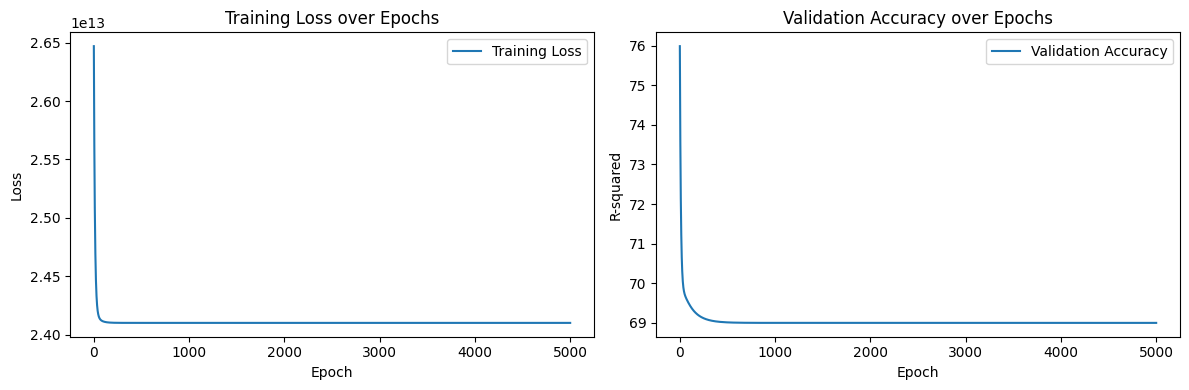

Final Validation Loss: 22974205788160.0
Final Accuracy: 68.99805821182059
--------------------------------------
Learning Rate: 0.001
Epoch 500/5000, Loss 24163897049088.000000, Accuracy 69.736302
Epoch 1000/5000, Loss 24113508777984.000000, Accuracy 69.466993
Epoch 1500/5000, Loss 24105153724416.000000, Accuracy 69.295324
Epoch 2000/5000, Loss 24102580518912.000000, Accuracy 69.185657
Epoch 2500/5000, Loss 24101720686592.000000, Accuracy 69.117165
Epoch 3000/5000, Loss 24101412405248.000000, Accuracy 69.074093
Epoch 3500/5000, Loss 24101299159040.000000, Accuracy 69.046820
Epoch 4000/5000, Loss 24101255118848.000000, Accuracy 69.029448
Epoch 4500/5000, Loss 24101238341632.000000, Accuracy 69.018329
Epoch 5000/5000, Loss 24101227855872.000000, Accuracy 69.011183


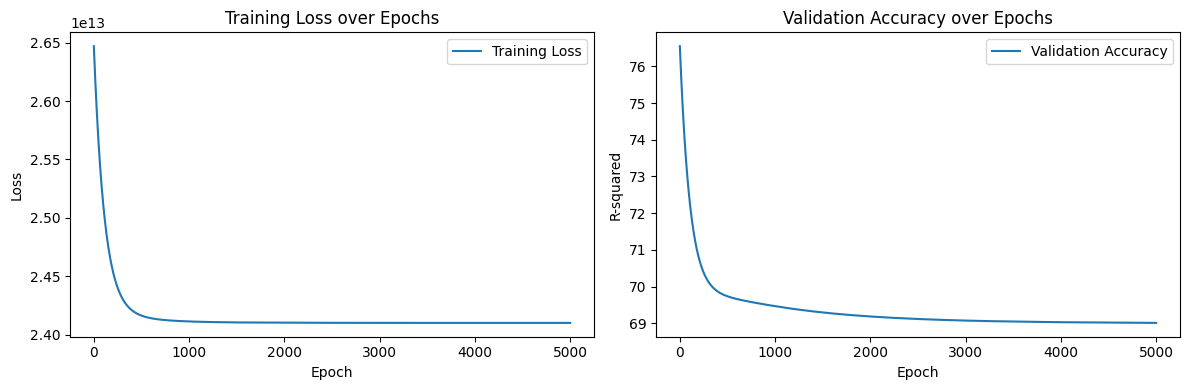

Final Validation Loss: 22978022604800.0
Final Accuracy: 69.01118254377316
--------------------------------------
Learning Rate: 0.0001
Epoch 500/5000, Loss 25637416861696.000000, Accuracy 74.043686
Epoch 1000/5000, Loss 25104532635648.000000, Accuracy 72.431780
Epoch 1500/5000, Loss 24763340685312.000000, Accuracy 71.421531
Epoch 2000/5000, Loss 24544045694976.000000, Accuracy 70.787720
Epoch 2500/5000, Loss 24402370494464.000000, Accuracy 70.388661
Epoch 3000/5000, Loss 24310211149824.000000, Accuracy 70.135361
Epoch 3500/5000, Loss 24249720897536.000000, Accuracy 69.972136
Epoch 4000/5000, Loss 24209539465216.000000, Accuracy 69.864242
Epoch 4500/5000, Loss 24182454747136.000000, Accuracy 69.790112
Epoch 5000/5000, Loss 24163865591808.000000, Accuracy 69.736424


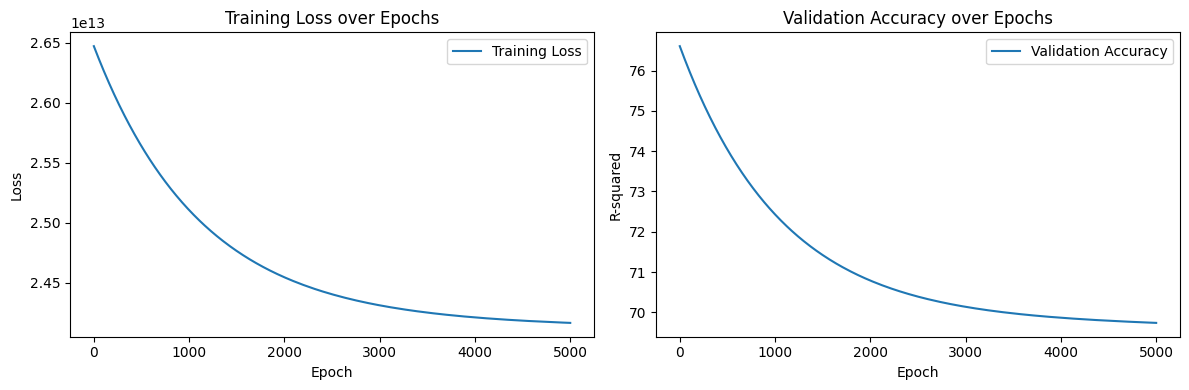

Final Validation Loss: 23188937375744.0
Final Accuracy: 69.73642447406674
--------------------------------------


In [39]:
#Problem 3 -SGD

#input variables = all features

# Get Values
X = housing.iloc[:, 1:11].values
y = housing.iloc[:, 0].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Scaling
sc = StandardScaler()  # Create a scaler object
X_train = sc.fit_transform(X_train)  # Fit the scaler to the training data and transform
X_test = sc.transform(X_test)  # Apply the scaler to the test data

# Convert to tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_test)
y_val = torch.FloatTensor(y_test)

#parameters
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,], requires_grad=True)

#Model
def model(X_train, params):
  area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking = params
  return(
        area * X_train[:, 0] +
        bedrooms * X_train[:, 1] +
        bathrooms * X_train[:, 2] +
        stories * X_train[:, 3] +
        mainroad * X_train[:, 4] +
        guestroom * X_train[:, 5] +
        basement * X_train[:, 6] +
        hotwaterheating * X_train[:, 7] +
        airconditioning * X_train[:, 8] +
        parking * X_train[:, 9]
  )
#Loss Function
def loss_fn(y_pred, y_true):
  squared_diff = (y_pred - y_true)**2
  return squared_diff.mean()

# Training Loop
def training_loop(n_epochs, optimizer, params, X_train, y_train, X_val, y_val):
    losses = []
    accuracies = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train, params)
        loss = loss_fn(y_pred, y_train)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        y_val_pred = model(X_val, params)
        val_loss = loss_fn(y_val_pred, y_val)
        val_r_squared = (abs(1 - (val_loss.item() / torch.var(y_val).item())))*10
        accuracies.append(val_r_squared)

        if epoch % 500 == 0:
            print('Epoch %d/%d, Loss %f, Accuracy %f' % (epoch, n_epochs, losses[-1], accuracies[-1]))

    # Plot losses and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, n_epochs + 1), losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, n_epochs + 1), accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('R-squared')
    plt.title('Validation Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return params


# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    # Initialize parameters
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,], requires_grad=True)

    # SGD Optimization
    optimizer = optim.SGD([params], lr=lr)

    # Actual Training
    print(f"Learning Rate: {lr}")
    training_loop(n_epochs=5000, optimizer=optimizer, params=params, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)

    # Final parameters and loss
    final_params = params.detach().numpy()
    final_t_p = model(X_val, final_params)
    final_loss = loss_fn(final_t_p, y_val)
    final_r_squared = 1 - (final_loss.item() / torch.var(y_val).item())

    print("Final Validation Loss:", final_loss.item())
    print("Final Accuracy:", (abs(final_r_squared))*10)
    print("--------------------------------------")


Learning Rate: 0.1
Epoch 500/5000, Loss 26469287854080.000000, Accuracy 76.612255
Epoch 1000/5000, Loss 26468608376832.000000, Accuracy 76.609976
Epoch 1500/5000, Loss 26467922608128.000000, Accuracy 76.607697
Epoch 2000/5000, Loss 26467243130880.000000, Accuracy 76.605411
Epoch 2500/5000, Loss 26466563653632.000000, Accuracy 76.603133
Epoch 3000/5000, Loss 26465884176384.000000, Accuracy 76.600839
Epoch 3500/5000, Loss 26465204699136.000000, Accuracy 76.598561
Epoch 4000/5000, Loss 26464523124736.000000, Accuracy 76.596289
Epoch 4500/5000, Loss 26463841550336.000000, Accuracy 76.594011
Epoch 5000/5000, Loss 26463162073088.000000, Accuracy 76.591725


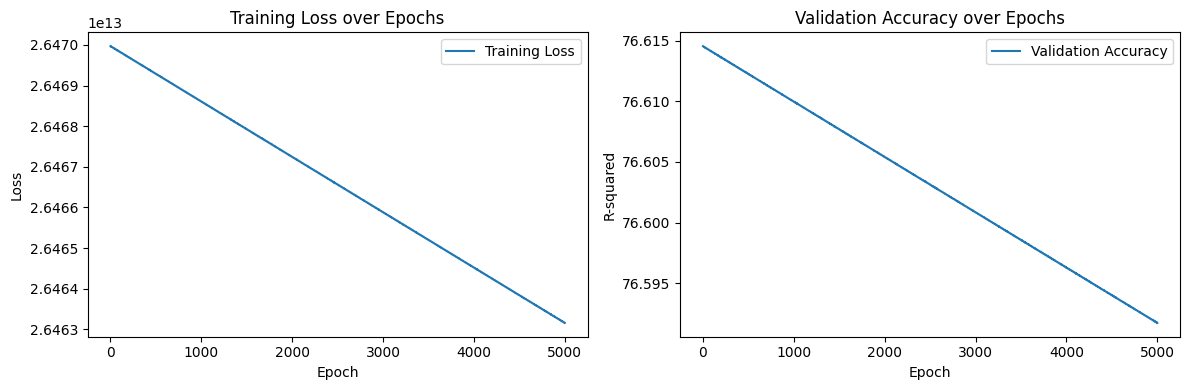

Final Validation Loss: 25182594924544.0
Final Accuracy: 76.59172456786605
--------------------------------------
Learning Rate: 0.01
Epoch 500/5000, Loss 26469898125312.000000, Accuracy 76.614310
Epoch 1000/5000, Loss 26469828919296.000000, Accuracy 76.614086
Epoch 1500/5000, Loss 26469759713280.000000, Accuracy 76.613856
Epoch 2000/5000, Loss 26469694701568.000000, Accuracy 76.613625
Epoch 2500/5000, Loss 26469627592704.000000, Accuracy 76.613401
Epoch 3000/5000, Loss 26469560483840.000000, Accuracy 76.613178
Epoch 3500/5000, Loss 26469491277824.000000, Accuracy 76.612947
Epoch 4000/5000, Loss 26469422071808.000000, Accuracy 76.612709
Epoch 4500/5000, Loss 26469357060096.000000, Accuracy 76.612478
Epoch 5000/5000, Loss 26469285756928.000000, Accuracy 76.612255


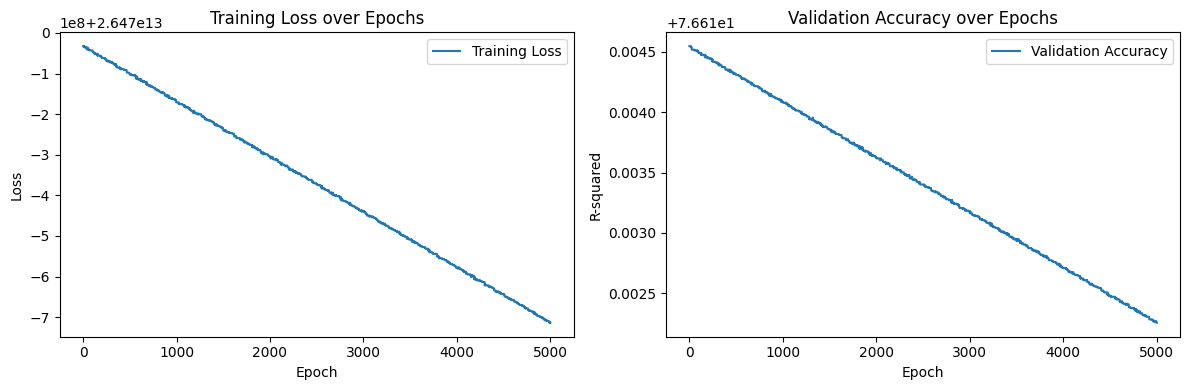

Final Validation Loss: 25188565516288.0
Final Accuracy: 76.612254772849
--------------------------------------
Learning Rate: 0.001
Epoch 500/5000, Loss 26469963137024.000000, Accuracy 76.614519
Epoch 1000/5000, Loss 26469956845568.000000, Accuracy 76.614490
Epoch 1500/5000, Loss 26469948456960.000000, Accuracy 76.614476
Epoch 2000/5000, Loss 26469937971200.000000, Accuracy 76.614454
Epoch 2500/5000, Loss 26469931679744.000000, Accuracy 76.614418
Epoch 3000/5000, Loss 26469927485440.000000, Accuracy 76.614411
Epoch 3500/5000, Loss 26469921193984.000000, Accuracy 76.614375
Epoch 4000/5000, Loss 26469910708224.000000, Accuracy 76.614353
Epoch 4500/5000, Loss 26469908611072.000000, Accuracy 76.614332
Epoch 5000/5000, Loss 26469898125312.000000, Accuracy 76.614310


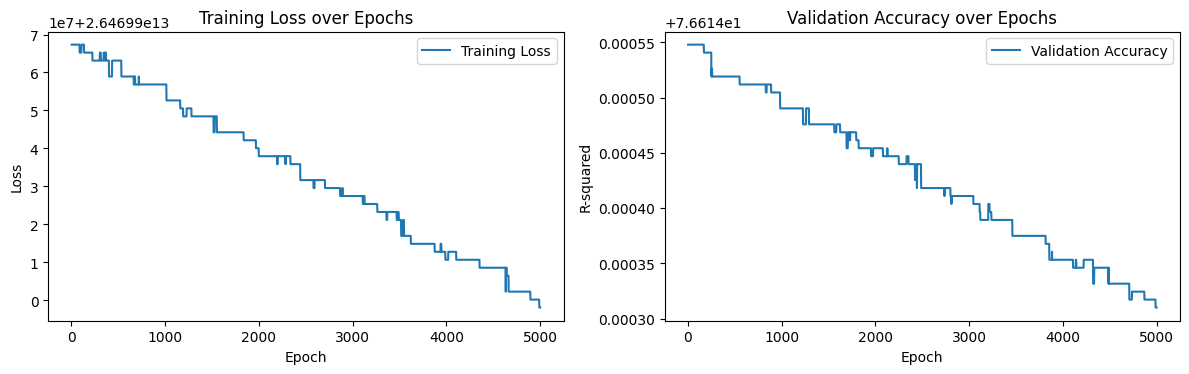

Final Validation Loss: 25189163204608.0
Final Accuracy: 76.61430995669872
--------------------------------------
Learning Rate: 0.0001
Epoch 500/5000, Loss 26469967331328.000000, Accuracy 76.614548
Epoch 1000/5000, Loss 26469965234176.000000, Accuracy 76.614548
Epoch 1500/5000, Loss 26469965234176.000000, Accuracy 76.614548
Epoch 2000/5000, Loss 26469965234176.000000, Accuracy 76.614541
Epoch 2500/5000, Loss 26469963137024.000000, Accuracy 76.614519
Epoch 3000/5000, Loss 26469963137024.000000, Accuracy 76.614519
Epoch 3500/5000, Loss 26469965234176.000000, Accuracy 76.614519
Epoch 4000/5000, Loss 26469958942720.000000, Accuracy 76.614519
Epoch 4500/5000, Loss 26469963137024.000000, Accuracy 76.614519
Epoch 5000/5000, Loss 26469963137024.000000, Accuracy 76.614519


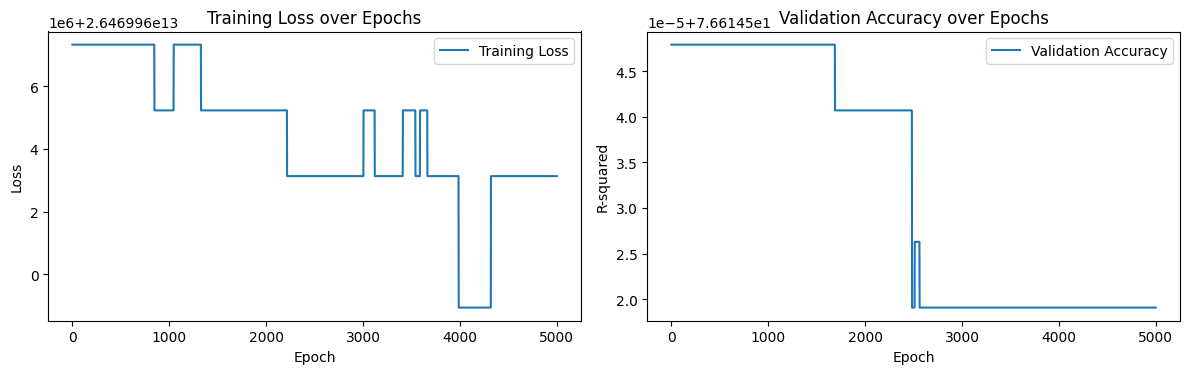

Final Validation Loss: 25189224022016.0
Final Accuracy: 76.61451908066938
--------------------------------------


In [33]:
#Problem 3 -Adam

#input variables = all features

# Get Values
X = housing.iloc[:, 1:11].values
y = housing.iloc[:, 0].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Scaling
sc = StandardScaler()  # Create a scaler object
X_train = sc.fit_transform(X_train)  # Fit the scaler to the training data and transform
X_test = sc.transform(X_test)  # Apply the scaler to the test data

# Convert to tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_test)
y_val = torch.FloatTensor(y_test)

#parameters
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,], requires_grad=True)

#Model
def model(X_train, params):
  area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking = params
  return(
        area * X_train[:, 0] +
        bedrooms * X_train[:, 1] +
        bathrooms * X_train[:, 2] +
        stories * X_train[:, 3] +
        mainroad * X_train[:, 4] +
        guestroom * X_train[:, 5] +
        basement * X_train[:, 6] +
        hotwaterheating * X_train[:, 7] +
        airconditioning * X_train[:, 8] +
        parking * X_train[:, 9]
  )
#Loss Function
def loss_fn(y_pred, y_true):
  squared_diff = (y_pred - y_true)**2
  return squared_diff.mean()

# Training Loop
def training_loop(n_epochs, optimizer, params, X_train, y_train, X_val, y_val):
    losses = []
    accuracies = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train, params)
        loss = loss_fn(y_pred, y_train)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        y_val_pred = model(X_val, params)
        val_loss = loss_fn(y_val_pred, y_val)
        val_r_squared = (abs(1 - (val_loss.item() / torch.var(y_val).item())))*10
        accuracies.append(val_r_squared)

        if epoch % 500 == 0:
            print('Epoch %d/%d, Loss %f, Accuracy %f' % (epoch, n_epochs, losses[-1], accuracies[-1]))

    # Plot losses and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, n_epochs + 1), losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, n_epochs + 1), accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('R-squared')
    plt.title('Validation Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return params


# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    # Initialize parameters
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,], requires_grad=True)

    # Adam Optimization
    optimizer = optim.Adam([params], lr=lr)

    # Actual Training
    print(f"Learning Rate: {lr}")
    training_loop(n_epochs=5000, optimizer=optimizer, params=params, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)

    # Final parameters and loss
    final_params = params.detach().numpy()
    final_t_p = model(X_val, final_params)
    final_loss = loss_fn(final_t_p, y_val)
    final_r_squared = 1 - (final_loss.item() / torch.var(y_val).item())

    print("Final Validation Loss:", final_loss.item())
    print("Final Accuracy:", (abs(final_r_squared))*10)
    print("--------------------------------------")
